Trabajar sobre Csv con el siguiente enlace



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None )
pd.set_option('display.max_rows', 120)

# Configuración de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#Limpiez_fechas

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

#Limpieza_Nulos / Rellenar valores
df["country"] = df["country"].fillna("No_registrado")
df["listed_in"] = df["listed_in"].fillna("No_registrado")

# 


# Separar Paises en listas
df["country_list"] = (
    df["country"].astype(str)
    .str.split(",")
    .apply(lambda xs: [x.strip() for x in xs])
)

# Variables_separacion_paises
df_county = df.explode("country_list", ignore_index=True)


# Top 10 paises con mas contenidos
top_countries = (
    df_county["country_list"]
    .value_counts()
    .head(10)
    .sort_values(ascending=True)
)

print(top_countries)
print("\n")


print("\n")
# Mostrar el DataFrame con países separados
print(df_county["country_list"])



country_list
Germany            226
South Korea        231
Spain              232
Japan              318
France             393
Canada             445
United Kingdom     806
Unknown            831
India             1046
United States     3690
Name: count, dtype: int64




0        United States
1         South Africa
2              Unknown
3              Unknown
4                India
             ...      
10845    United States
10846          Unknown
10847    United States
10848    United States
10849            India
Name: country_list, Length: 10850, dtype: object


,Cantidad de contenidos
country_list,
Germany,226
South Korea,231
Spain,232
Japan,318
France,393
Canada,445
United Kingdom,806
Unknown,831
India,1046


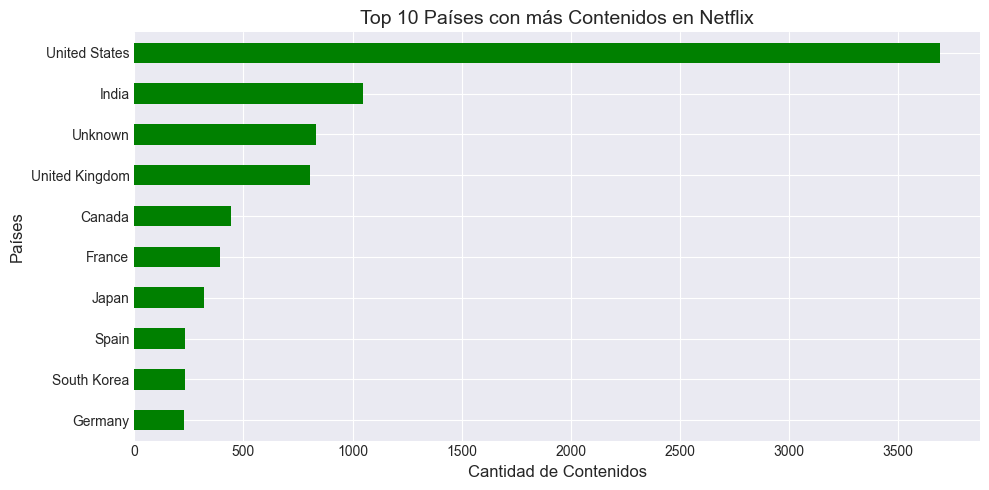

Cantidad de contenidos de Colombia: 52


In [ ]:
# Mostrar el conteo de los 10 países con más contenidos
display(top_countries.to_frame("Cantidad de contenidos"))

# Gráfico de barras horizontales para los 10 países con más contenidos
top_countries.plot(kind='barh', color='green')
plt.title('Top 10 Países con más Contenidos en Netflix')
plt.xlabel('Cantidad de Contenidos')
plt.ylabel('Países')
plt.tight_layout()        
plt.show()


